# Kelompok 6 - PYTN - KS -019

# A. Perkenalan

## A.1. Latar Belakang
Uber dan Lyft adalah dua perusahaan layanan transportasi berbasis aplikasi yang menyediakan layanan pemesanan kendaraan dengan sopir secara on-demand melalui aplikasi ponsel pintar. Kedua perusahaan ini memungkinkan pengguna untuk memesan mobil atau taksi melalui aplikasi mereka, dan kemudian mendapatkan pengemudi yang tersedia untuk mengantar mereka ke tujuan yang diinginkan.

Perbedaan utama antara Uber dan Lyft mungkin termasuk harga, opsi kendaraan, dan kehadiran regional. Keduanya bersaing di industri yang sama dan beroperasi di banyak kota di seluruh dunia.

Analisis Ini menggunakan Konsep Linear Regression.Linear Regression adalah etode statistik yang digunakan untuk memahami hubungan antara satu variabel terikat (variabel dependen) dengan satu atau lebih variabel bebas (variabel independen). Tujuannya adalah untuk memodelkan hubungan linier antara variabel-variabel tersebut sehingga dapat digunakan untuk membuat prediksi atau estimasi.

## A.2. Dataset

Analisis ini menggunakan data yang bersumber dari kaggle yaitu <a href="https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma" title="Uber vs Lyft">Uber vs Lyft</a>. Dataset Uber & Lyft ini berisi 693.071 baris dan 57 kolom.

## A.2. Tujuan
Membuat suatu analisa data dan melakukan implementasi ,targetnya sebagai berikut :


*   Mampu memahami konsep regression dengan Linear Regression
*   Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
*   Mampu mengimplementasikan Linear Regression untuk membuat prediksi




# B. Import Pustaka

In [50]:
# Import Library dataframe
import pandas as pd
import numpy as np
from numpy import mean
#Library untuk visualisasi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import untuk preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#import untuk modelling atau analysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats


# C. Data Loading

Data Loading adalah proses untuk memuat data atau kumpulan data dari sumber , folder atau aplikasi ke database. pada project ini data loading digunakan untuk mengimport file csv

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
#memanggil dataset
df = pd.read_csv("/content/drive/MyDrive/Data Science/rideshare_kaggle.csv")

In [31]:
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [32]:
#mengecek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [33]:
#melihat ukuran data
df.shape

(693071, 57)

**Keterangan dataset:**

Dataset ini berisi 57 kolom yang bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri, yaitu sebagai berikut:

1. `id` = nomor identifikasi unik untuk setiap perjalanan
2. `timestamp` = cap waktu unik untuk penanda perjalanan
3. `hour` = jam ketika perjalanan dimulai
4. `day` = hari ketika perjalanan dimulai
5. `month` = bulan perjalanan dimulai
6. `datetime` = waktu ketika perjalanan dimulai (dalam bentuk YYYY-MM-DD HH-MM-SS)
7. `timezone` = zona waktu ketika perjalanan dimulai (hanya satu jenis yaitu America/New_York)
8. `source` = lokasi awal perjalanan (titik jemput)
9. `destination` = lokasi tujuan perjalanan
10. `cab_type` = jenis taksi yang digunakan dalam perjalanan (Uber atau Lyft)
11. `product_id` = kode unik untuk identifikasi layanan yang digunakan
12. `name` = nama mobil layanan yang digunakan
13. `price` = harga yang dibebankan dalam perjalanan
14. `distance` = total jarak perjalanan dalam satuan mil
15. `surge_multiplier` = rasio pengganda tarif perjalanan saat permintaan tinggi
16. `latitude` = garis lintang lokasi awal perjalanan
17. `longitude` = garis bujur lokasi awal perjalanan
18. `temperature` = suhu pada lokasi awal perjalanan
19. `apparentTemperature` = suhu yang dirasakan di lokasi awal perjalanan
20. `short_summary` = ringkasan cuaca di lokasi awal
21. `long_summary` = deskripsi cuaca di lokasi awal
22. `precipIntensity` = intensitas curah hujan di lokasi awal perjalanan
23. `precipProbability` = probabilitas curah hujan di lokasi awal perjalanan
24. `humidity` = kelembaban di lokasi awal
25. `windSpeed` = kecepatan angin di lokasi awal perjalanan
26. `windGust` = kecepatan rata-rata dari lonjakan angin di lokasi awal perjalanan
27. `windGustTime` = waktu saat lonjakan angin terjadi
28. `visibility` = jarak pandang di lokasi awal perjalanan
29. `temperatureHigh` = suhu tertinggi di lokasi awal
30. `temperatureHighTime` = waktu suhu tertinggi yang terjadi di lokasi awal perjalanan
31. `temperatureLow` = suhu terendah di lokasi awal perjalanan
32. `temperatureLowTime` = waktu suhu terendah yang terjadi di lokasi awal perjalanan
33. `apparentTemperatureHigh` = suhu tertinggi yang dirasakan di lokasi awal perjalanan
34. `apparentTemperatureHighTime` = waktu suhu tertinggi yang dirasakan di lokasi awal perjalanan
35. `apparentTemperatureLow` = suhu terendah yang dirasakan di lokasi awal perjalanan
36. `apparentTemperatureLowTime` = waktu suhu terendah yang dirasakan di lokasi awal perjalanan
37. `icon` = ikon cuaca di lokasi awal
38. `dewPoint` = titik embun di lokasi
39. `pressure` = tekanan udara dalam satuan millibar (mb)
40. `windBearing` = arah angin dalam derajat dari utara searah jarum jam, diukur pada ketinggian 10 meter di atas permukaan tanah
41. `cloudCover` = persentase tutupan awan
42. `uvIndex` = indeks radiasi ultraviolet yang diproyeksikan pada tengah hari matahari
43. `visibility.1` = jarak pandang pada satuan mil
44. `ozone` = konsentrasi ozon
45. `sunriseTime` = waktu matahari terbit
46. `sunsetTime` = waktu matahari terbenam
47. `moonPhase` = fase bulan dalam skala 0 hingga 1
48. `precipIntensityMax` = intensitas presipitasi maksimum dalam satuan inci per jam (in/h)
49. `uvIndexTime` = waktu ketika uvIndex dihitung
50. `temperatureMin` = suhu minimum pada hari itu dalam satuan Fahrenheit (°F)
51. `temperatureMinTime` = waktu ketika suhu minimum yang dirasakan terjadi
52. `temperatureMax` = suhu maksimum pada hari itu dalam satuan Fahrenheit (°F)
53. `temperatureMaxTime` = waktu ketika suhu maksimum yang dirasakan terjadi
54. `apparentTemperatureMin` = suhu minimum yang dirasakan pada hari itu dalam satuan Fahrenheit (°F)
55. `apparentTemperatureMinTime` = waktu ketika suhu minimum yang dirasakan terjadi
56. `apparentTemperatureMax` = suhu maksimum yang dirasakan pada hari itu dalam satuan Fahrenheit (°F)
57. `apparentTemperatureMaxTime` = waktu ketika suhu maksimum yang dirasakan terjadi

# D. Data Cleaning

Data cleaning adalah sebuah proses untuk menyiapkan data dengan cara menghapus atau memodifikasi data yang salah, tidak revelan , tidak akurat dan juga data duplikat  

## D.1.Mencari dan membersihkan

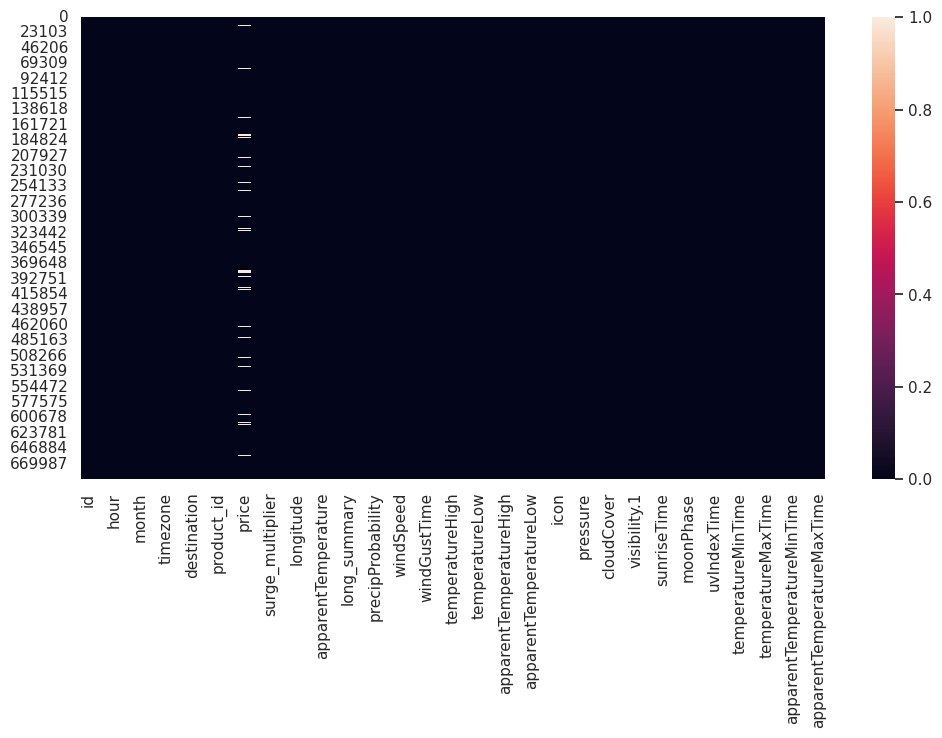

In [34]:
# Mencari Missing value dengan heatmap
sns.heatmap(df.isna())
plt.show()

In [35]:
# melakukan perhitungan persentase nilai-nilai yang hilang (nan atau null) pada setiap kolumn
df.isna().sum()/len(df)*100

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


In [36]:
# Menghapus missing value dengan dropna
df.dropna(subset=['price'], inplace = True)

## D.2. Mengubah tipe data datetime

In [37]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit = 's')

# E. Explorasi Data

Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan.

## E.1. Visualisasi data

Kemudian melakukan visualisasi dengan melihat distribusi perjalanan uber dan lyft dalam jarak waktu month dimana kita melakukan dua visualisasi data yang dapat dilihat sebagai berikut
* Mencari Jumlah perjalanan dalam jangka waktu 1 bulan
* Mencari jarak harga Uber dan Lyft

### Mencari jarak perjalanan dalam jangka waktu 1 bulan

In [38]:
# Melihat data unik dalam kolom cab_type
ct_unique = df['cab_type'].unique()
print(ct_unique)

['Lyft' 'Uber']


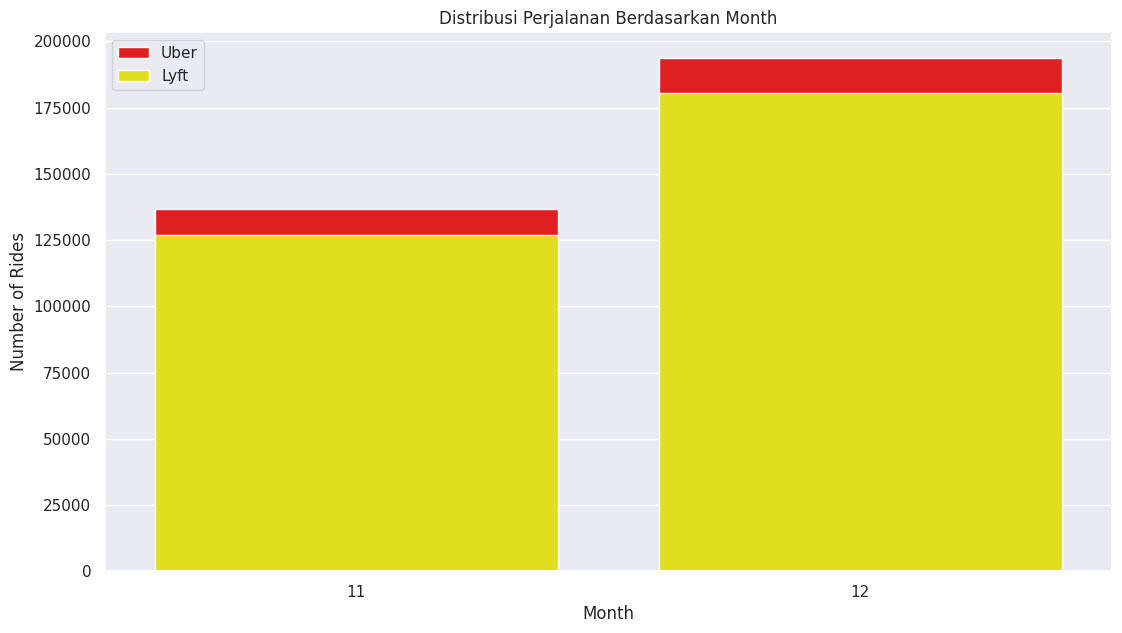

In [39]:
#Jumlah perjalanan dalam jangka waktu 1 bulan
month_count  = df.groupby([df['timestamp'].dt.month, 'cab_type'])['id'].count().unstack().fillna(0)
plt.figure(figsize = (13,7))
sns.barplot(x = month_count.index, y= month_count['Uber'], label = 'Uber', color = 'red')
sns.barplot(x = month_count.index, y= month_count['Lyft'], label = 'Lyft', color = 'yellow')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Distribusi Perjalanan Berdasarkan Month')
plt.legend()
plt.show()


Dari grafik di atas kita dapat melihat dari penggunaan perjalanan uber berdasarkan bulan lebih sedikit lebih tinggi di bandingkan dari penggunaan Lyft.

### Mencari jarak harga Uber dan Lyft

<Axes: xlabel='cab_type', ylabel='price'>

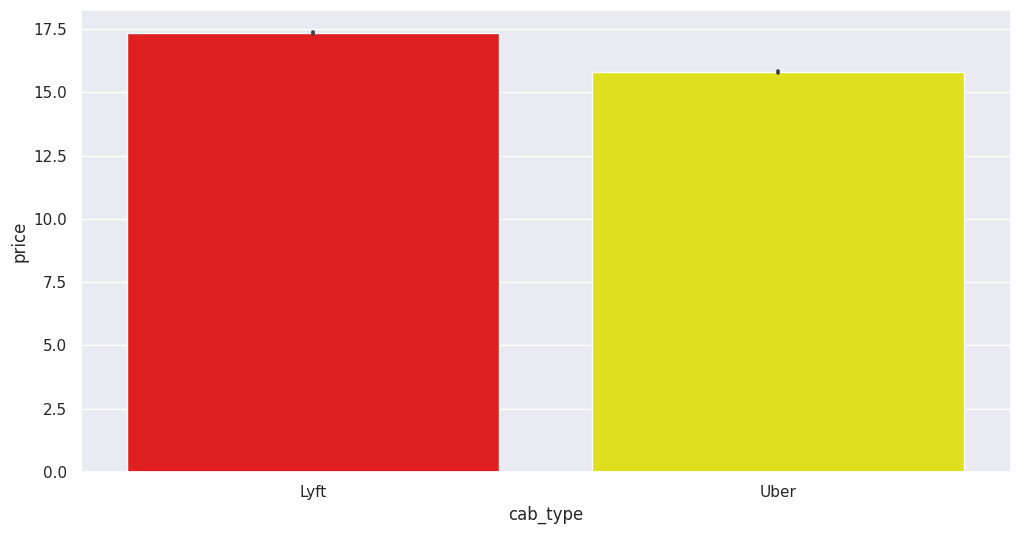

In [40]:
sns.set(rc = {'figure.figsize':(12,6)})
cols = ['red','yellow']
sns.barplot(x='cab_type',y='price',palette = cols, data = df)

In [41]:
#Melihat nilai mean
df.groupby('cab_type')['price'].mean()

cab_type
Lyft    17.351396
Uber    15.795343
Name: price, dtype: float64

Keterangan :
berdasarkan visualisasi di atas jarak harga Uber dan lyft yang memiliki nilai tinggi adalah lyft karena nilai rata-taranya 17.35 sedangkan uber hanya 15.79

# F. Data Preprocessing

Data Pre-Processing adalah tahapan menghilangkan beberapa permasalahan yang bisa mengganggu saat pemprosesan data.karena kita sudah melakukan pembersihan data null disini kita akan melakukan pengecheckkan kembali seperti mengecheck missing value

In [42]:
#Melihat  missing value
missing_values = df.isnull().sum()

print ("data missing value :")
print (missing_values[missing_values > 0])

data missing value :
Series([], dtype: int64)


Sudah tidak ada hasil karena kita sudah membersihkan nilai null atau nan

In [51]:
df_cor = df.loc[:,['distance','surge_multiplier','price']]
df_cor

,distance,surge_multiplier,price
0,0.44,1.0,5.0
1,0.44,1.0,11.0
2,0.44,1.0,7.0
3,0.44,1.0,26.0
4,0.44,1.0,9.0
...,...,...,...
693065,1.00,1.0,9.5
693066,1.00,1.0,13.0
693067,1.00,1.0,9.5
693069,1.00,1.0,27.0


## Membuat Label Encoder

In [61]:
label_encoder = preprocessing.LabelEncoder()
df_category = df_cor.select_dtypes(include='object')
df_encode_cor = df_cor.copy()

for column in df_category.columns:
    df_encode_cor[column] = label_encoder.fit_transform(df_cor[column])

# G. Pendefinisian Model

dalam cell ini kami menggunakan cardinality yang bertujuan untuk mengurangi cardinality dan membuat model lebih konsisten

In [57]:
df_carr = df_cor.loc[:,['distance','surge_multiplier','price']]
df_carr.head()

,distance,surge_multiplier,price
0,0.44,1.0,5.0
1,0.44,1.0,11.0
2,0.44,1.0,7.0
3,0.44,1.0,26.0
4,0.44,1.0,9.0


In [58]:
print('Number of categories in the variable Distance : {}'.format(len(df_carr.distance.unique())))
print('Number of categories in the variable Surge Multiplier : {}'.format(len(df_carr.surge_multiplier.unique())))
print('Number of categories in the variable Price : {}'.format(len(df_carr.price.unique())))

Number of categories in the variable Distance : 549
Number of categories in the variable Surge Multiplier : 7
Number of categories in the variable Price : 147


Hasil cardinality di atas distance memiliki unique value yang banyak hal ini bisa terjadi karena distance jarak tempuh perjalanan

In [59]:
model = LinearRegression()

# H .Pelatihan Model

disini kita juga menambahkan label encoder untuk menkoversikan nilai bulat kemudian menggunakan feature scalling yang dimana untuk membuat skala data setiap fitur menjadi sama

In [62]:
x = df_encode_cor.drop(columns=['price'],axis=1).values
y = df_encode_cor['price'].values

In [63]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [64]:
#melakukan fit
model_kondisi = model.fit(x_train, y_train)
y_pred = model_kondisi.predict(x_test)

#I. Evaluasi Model

Evaluasi Model adalah menguji akurasi data testing menggunakan evaluasi model setalah linear regression berisi :


1.   R-squared, MSE, RMSE
2.   Nilai intercept dan slope
3.   Melihat perbandingan Hasil Prekdisi dan harga aktualnya



## I.1. R-squared, MSE, RMSE

* R-squared (R²) adalah sebuah metrik statistik yang digunakan untuk mengevaluasi sejauh mana variabilitas dari variabel terikat (dependent variable) dapat dijelaskan oleh variabel independen (independent variable) dalam suatu model regresi.
* MSE mengukur rata-rata dari kuadrat perbedaan antara nilai prediksi dari model dan nilai sebenarnya (ground truth).
* RMSE adalah akar kuadrat dari MSE. Hal ini dilakukan untuk memberikan skala hasil yang konsisten dengan unit data aslinya.

In [65]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Nilai dari R-squared : ', r2_score(y_test, y_pred)*100)
print('Nilai dari MSE : ', mse)
print('Nilai dari RMSE : ', rmse)

Nilai dari R-squared :  17.50269520574934
Nilai dari MSE :  71.92149895182439
Nilai dari RMSE :  8.480654394079762


## I.2. Mencari Nilai Intercept dan Slope

* Intercept (sering disebut juga sebagai "konstanta" atau "b") adalah nilai dari variabel terikat (dependent variable) ketika semua variabel independen (independent variables) adalah nol.
* Slope (disebut juga sebagai "gradien" atau "koefisien regresi") adalah ukuran dari seberapa besar perubahan yang diharapkan dalam variabel terikat ketika variabel independen berubah sebesar satu satuan.

In [67]:
coef = model_kondisi.coef_
intercept = model_kondisi.intercept_
print("Nilai Analisa dari Intercept : ",model_kondisi.intercept_)
print("Nilai Analisa dari Slope : ",model_kondisi.coef_)

Nilai Analisa dari Intercept :  -12.441438573088494
Nilai Analisa dari Slope :  [ 2.78109695 22.56177488]


## I.3. Melihat perbandingan Hasil Prekdisi dan harga aktualnya

In [69]:
y_pred

array([22.66308357, 17.90740778, 13.15173199, ..., 14.29198174,
       15.59909731, 13.26297587])

In [70]:
kondisi = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
kondisi.head()

,Actual,Predicted
0,7.0,22.663084
1,10.5,17.907408
2,7.0,13.151732
3,15.5,12.678946
4,16.5,13.235165


In [ ]:
condition = (y_test < 30)
subset_x = y_test
subset_y = y_pred

plt.figur(figsize=(8,6))
sns.scatterplot(x= subset_x, y=subset_y, color='red',alpha=0.5, marker='o')



#J. Model Interface

Disini menggunakan visualisasi yand dimana isinya untuk melakukan perbandingan dari analisa perbandingan hasil aktual dan hasil prediksi

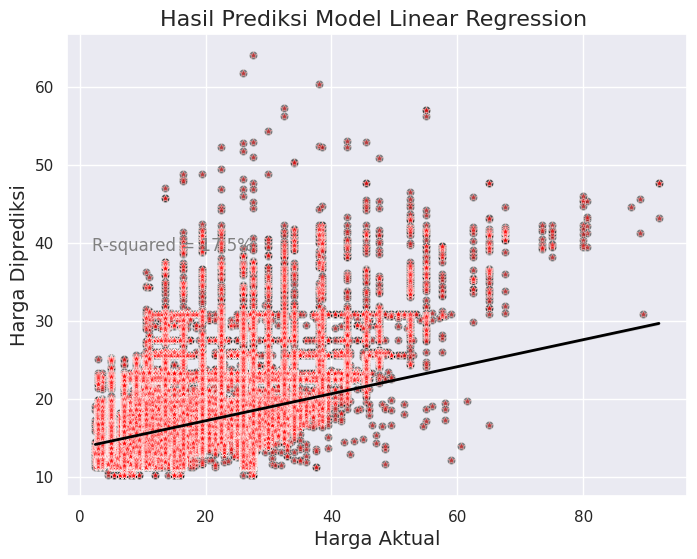

In [78]:
condition = (y_test < 50) # kondisi untuk subset pertama
subset1_x1 = y_test
subset1_y1 = y_pred

subset2_x1 = y_test
subset2_y1 = y_pred

# Buat scatter plot untuk setiap subset dengan marker yang berbeda
plt.figure(figsize=(8,6))
sns.scatterplot(x=subset1_x1, y=subset1_y1, color='Black', alpha=0.5, marker='o')
sns.scatterplot(x=subset2_x1, y=subset2_y1, color='Red', alpha=0.5, marker='*')

# Menambahkan garis regresi untuk seluruh data
sns.regplot(x=y_test, y=y_pred, color='black', scatter=False, line_kws={'lw':2})

plt.title('Hasil Prediksi Model Linear Regression ', fontsize=16)
plt.xlabel('Harga Aktual', fontsize=14)
plt.ylabel('Harga Diprediksi', fontsize=14)

# Menambahkan anotasi
plt.text(2, 39, f'R-squared = {round(r2_score(y_test, y_pred)*100, 2)}%', fontsize=12, color='grey')

plt.show()

# Kesimpulan


Pada final project pemodelan menggunakan Linear Regression untuk melakukan percobaan konsep regression ,mempersiapkan data dan mengimplementasi kan datanya.
Hal yang dilakukan project ini :
* Melakukan persiapan : seperti eksplorasi dan membersihkan nilai null
* Melakukan visualisasi : seperti mencari menghitung perjalanan berdasarkan lokasi tujuan
* Melakukan prediksi : seperti melakukan prediksi terhadap column price



Kemudian pada evaluasinya menggunakan metode :
1.   R-squared, MSE, RMSE
2.   Nilai intercept dan slope
3.   Melihat perbandingan Hasil Prekdisi dan harga aktualnya


yang terakhir melakukan model interface dimana disini kita menampilkan visualisasi menggunakan scatter plot untuk melihat perbandingan hasil aktual dan hasil prediksi